In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ensure current working directory is the correct one
os.chdir(r'//wsl.localhost/Ubuntu/home/ers1n25/AGNI')

# **Plot Stellar Spectra for Sanity Check**

In [2]:
# read in model data for varying atmospheres
df_0001bar = pd.read_csv('./csv/ATM/0.001bar.csv')
df_001bar = pd.read_csv('./csv/ATM/0.01bar.csv')
df_01bar = pd.read_csv('./csv/ATM/0.1bar.csv')
df_1bar = pd.read_csv('./csv/ATM/1bar.csv')
df_10bar = pd.read_csv('./csv/ATM/10bar.csv')
df_100bar = pd.read_csv('./csv/ATM/100bar.csv')
df_1000bar = pd.read_csv('./csv/ATM/1000bar.csv')

# read in stellar spectra of trappist-1
star = pd.read_csv('./res/stellar_spectra/trappist-1.txt', delimiter='\t', header=None, skiprows=2)
star.columns = ['wavelength', 'flux']

C:\Users\ers1n25\AppData\Local\Temp\ipykernel_8344\731787525.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e6)


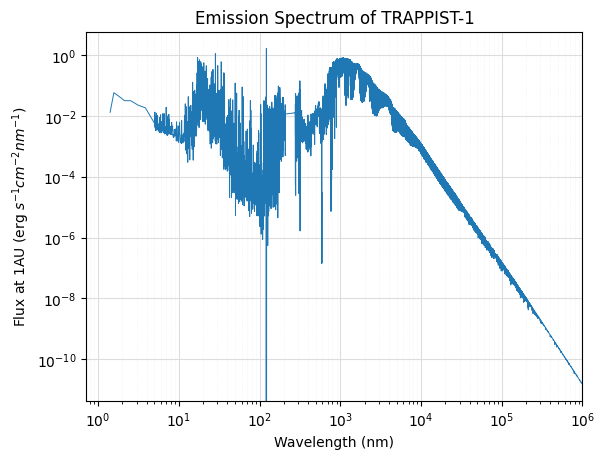

In [3]:
# plot the emission spectrum of trappist-1 at 1AU for comparison to lit data (data from MUSCLES survey, described in Wilson et. al. 2021)
plt.plot(star['wavelength'], star['flux'], lw=0.7)
plt.grid(which='major', color='#DDDDDD', lw=0.8)
plt.grid(which='minor', color='#EEEEEE', ls=':', lw=0.5)
plt.minorticks_on()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 1e6)
plt.title('Emission Spectrum of TRAPPIST-1')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux at 1AU (erg $s^{-1} cm^{-2} nm^{-1}$)')
plt.show()

# **Plot Emission Spectra of AGNI Planet Data Relative to Stellar Flux**

In [ ]:
# convert spectral flux density (which is calculated using irradiances so is actually an intensity) of the planet at TOA into
# the relative flux between the star and the planet as seen by a distant observer (units of parts per million (dimensionless))
def correct_flux(star_flux_1_AU, planet_intensity_TOA):
    dist = 1.496e11 # distance at which stellar flux was given (1 AU in m)
    radius = 6.378e6 * 1.116 # radius of the planet (m) from Gillon 2024

    # convert the planet intensity into the planet flux
    planet_flux_TOA = np.pi * planet_intensity_TOA
    # a factor of 1e6 is added to convert to parts per million
    scale_factor = 1e6 * (radius / dist) ** 2

    return scale_factor * (planet_flux_TOA / star_flux_1_AU)

In [5]:
# plot model fluxes in units of parts per million (dimensionless)
def plot_flux(dataFrame):
    # set up empty columns to hold closest wavelength value and associated stellar flux
    dataFrame['star_closest_wavelength'] = 0.0
    dataFrame['star_closest_flux'] = 0.0

    # find closest stellar data wavelength value to those used in the model and the associated stellar flux by homebrew interpolation
    for i in range(0, len(dataFrame['x_values'])):
        dataFrame.loc[i, 'star_closest_wavelength'] = star['wavelength'][np.abs(star['wavelength'] - dataFrame['x_values'][i]).argmin()]
        dataFrame.loc[i, 'star_closest_flux'] = star['flux'][np.abs(star['wavelength'] - dataFrame['x_values'][i]).argmin()]

    # convert planet and star flux/intensity to relative flux
    dataFrame['relative_flux'] = correct_flux(dataFrame['star_closest_flux'], dataFrame['total'])

    # convert nanometres to micrometres
    dataFrame['microns'] = dataFrame['x_values'] / 1000

    # plot graph
    plt.plot(dataFrame['microns'], dataFrame['relative_flux'])

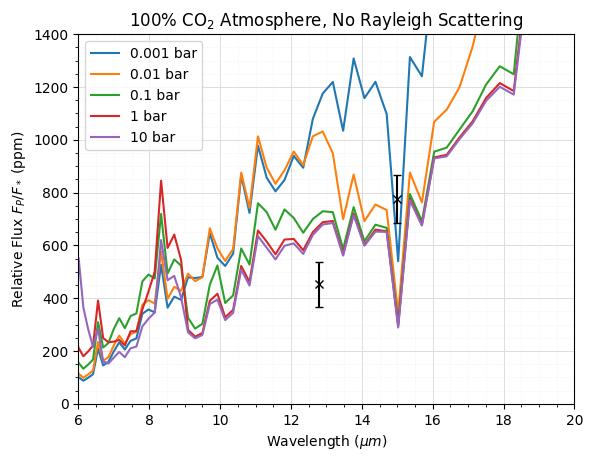

In [6]:
# plot model data
plot_flux(df_0001bar)
plot_flux(df_001bar)
plot_flux(df_01bar)
plot_flux(df_1bar)
plot_flux(df_10bar)
# plot_flux(df_100bar)
# plot_flux(df_1000bar)

# add literature values of relative flux from Ducrot et. al. 2024
plt.errorbar(12.8, 452, yerr=86, marker='x', color='k', capsize=3)
plt.errorbar(15, 775, yerr=90, marker='x', color='k', capsize=3)

# add both major and minor grid lines
plt.grid(which='major', color='#DDDDDD', lw=0.7)
plt.grid(which='minor', color='#EEEEEE', ls=':', lw=0.5)
plt.minorticks_on()

# add title
plt.title('100% CO$_2$ Atmosphere, No Rayleigh Scattering')

# add legend
plt.legend(['0.001 bar', '0.01 bar', '0.1 bar', '1 bar', '10 bar'])

# set x and y axis limits
plt.xlim(6, 20)
plt.ylim(0, 1400)

# set the x and y axis labels
plt.xlabel(r'Wavelength ($\mu m$)')
plt.ylabel('Relative Flux $F_P / F_*$ (ppm)')

# show the plot
plt.show()